# ROC Curves

Go over basics of Receiver Operator Characteristic curves.

Assume one feature: $x$, and we want to distinguish $A$ from $B$, where $A$ is the signal and $B$ is the background.

Often, the classifier is based on a threshold, choose $A$ if $x > \lambda$.

The Bayes decision rule would choose $A$ if $P(A|x) > P(B|x)$. If the PDF for $A$ and $B$ are both normal with the same variance, then the Bayes decision rule is equivalent to a threshold.

The Bayes decision rule would be a particular classifier, ROC curves allow one to look at the behavior of a family of classifiers.


In [41]:
import numpy as np
import scipy
import scipy.stats
import collections

%matplotlib inline
import matplotlib.pyplot as plt

## Plot PDF's
how to use scipy to generate pdf's to plot

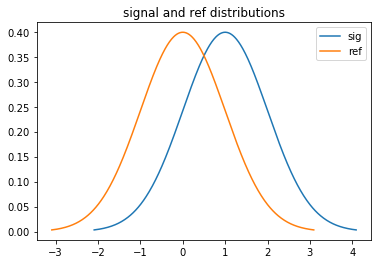

In [40]:
signal = scipy.stats.norm(loc=1.0, scale=1.0)
ref = scipy.stats.norm(loc=0.0, scale=1.0)

def gen_pdf(dist, start_cum_prob=0.001, end_cum_prob=0.999, num=500):
    xx = np.linspace(dist.ppf(start_cum_prob), dist.ppf(end_cum_prob), num=num)
    yy = dist.pdf(xx)
    return xx,yy

xx_sig, yy_sig = gen_pdf(signal)
xx_ref, yy_ref = gen_pdf(ref)
plt.plot(xx_sig, yy_sig, label='sig');
plt.plot(xx_ref, yy_ref, label='ref');
plt.title('signal and ref distributions')
plt.legend()

# ROC Curve

The ROC curve is typically computed by varying a parameter, a threshold for the classifier. 

To fill out the contigency table:

<pre>
  | A   | B   |
  | --- | --- |
  | TP  | FN  |
  | FP  | TN  |
</pre>

Assuming we have priors for $P(A)$ and $P(B)$, we do:

$$ TP = P(A)P(x>\lambda|A) $$
$$ FN = P(A)P(x<\lambda|A) $$
$$ FP = P(B)P(x>\lambda|B) $$
$$ TN = P(B)P(x>\lambda|B) $$

and then form

$$ TPR = \frac{TP}{TP+FN} $$
$$ FNR = \frac{FP}{FP+TN} $$

These are the points plotted, as $\lambda$ varies.

In [36]:
def plot_roc(ref, sig, prob_ref=0.5, prob_sig=0.5):
    aa = max(ref.ppf(0.001), sig.ppf(0.001))
    bb = min(ref.ppf(0.999), sig.ppf(0.999))
    xx = np.linspace(aa, bb,num=100)
    tp = (1.0 - sig.cdf(xx))*prob_sig
    fn = sig.cdf(xx) * prob_sig
    fp = (1.0-ref.cdf(xx)) * prob_ref
    tn = ref.cdf(xx)*prob_ref
    
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr[0], tpr[0], 'o', label='$\lambda$=%.1f' % aa, markersize=10)
    plt.plot(fpr[-1], tpr[-1], 'o', label='$\lambda$=%.1f' % bb, markersize=10)
    plt.title('ROC curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

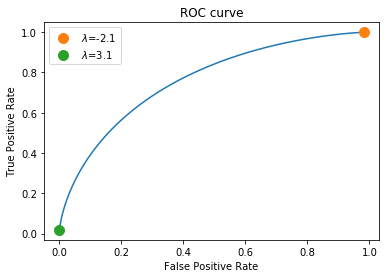

In [38]:
signal = scipy.stats.norm(loc=1.0, scale=1.0)
ref = scipy.stats.norm(loc=0.0, scale=1.0)
plot_roc(ref, signal, prob_ref=0.8, prob_sig=0.1)